In [4]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os datasets
try:
    df_leitos = pd.read_excel('Dados_Tratados.xlsx',sheet_name='Leitos')
    df_pacientes = pd.read_excel('Dados_Tratados.xlsx',sheet_name='Pacientes')
    df_movimentacao = pd.read_csv('eventos_movimentacao.csv', sep=';', engine='python')
except FileNotFoundError:
    print("Certifique-se de que os arquivos CSV estão no mesmo diretório do script.")
    exit()


In [5]:
#exibição 
print('************ Leitos *************')
print(df_leitos.head())
print('********** Pacientes **********')
print(df_pacientes.head())
print('********** Movimento **********')
print(df_movimentacao.head())

************ Leitos *************
  Leito       Local categoria situacaoleito Paciente_Associado datainicio  \
0  L001   Pediatria  Infantil       Ocupado                P28 2025-07-18   
1  L002  Enfermaria    Adulto         Livre                NaN        NaT   
2  L003         UTI  Infantil       Limpeza                NaN        NaT   
3  L004  Enfermaria  Infantil       Ocupado               P156 2025-07-05   
4  L005   Pediatria  Infantil    Manutenção                NaN        NaT   

       dtfim Cod_Paciente  
0 2025-07-28        P0028  
1        NaT          NaN  
2        NaT          NaN  
3 2025-07-11        P0156  
4        NaT          NaN  
********** Pacientes **********
  ID_Paciente  Idade Sexo    Faixa Tipo_Internacao
0       P0001      4    M  Criança             UTI
1       P0002     65    M   Adulto       Cirúrgica
2       P0003     42    F   Adulto         Clínica
3       P0004     10    M   Adulto       Cirúrgica
4       P0005      2    M  Criança       Cirúrgi

In [6]:
# --- Tratamento de Dados ---

# Renomear colunas para facilitar o acesso
df_leitos.columns = ['ID_Leito', 'Setor', 'Tipo_Leito', 'Status', 'Paciente_Associado', 'Data_Ocupacao', 'Data_Liberacao','Cod_Paciente']

print(df_leitos.head())


  ID_Leito       Setor Tipo_Leito      Status Paciente_Associado  \
0     L001   Pediatria   Infantil     Ocupado                P28   
1     L002  Enfermaria     Adulto       Livre                NaN   
2     L003         UTI   Infantil     Limpeza                NaN   
3     L004  Enfermaria   Infantil     Ocupado               P156   
4     L005   Pediatria   Infantil  Manutenção                NaN   

  Data_Ocupacao Data_Liberacao Cod_Paciente  
0    2025-07-18     2025-07-28        P0028  
1           NaT            NaT          NaN  
2           NaT            NaT          NaN  
3    2025-07-05     2025-07-11        P0156  
4           NaT            NaT          NaN  


In [9]:
leitos_por_status = df_leitos['Status'].value_counts()
print(leitos_por_status)
leitos_por_setor = df_leitos['Setor'].value_counts()
print("*********************************")
print(leitos_por_setor)


Status
Ocupado       61
Livre         23
Manutenção    11
Limpeza        5
Name: count, dtype: int64
*********************************
Setor
Enfermaria     32
UTI            26
Pediatria      23
Maternidade    19
Name: count, dtype: int64


In [11]:
# Converter colunas de data para datetime

#errors='coerce' → Converte valores inválidos em NaT (Not as Time)


df_leitos['Data_Ocupacao'] = pd.to_datetime(df_leitos['Data_Ocupacao'], errors='coerce')
df_leitos['Data_Liberacao'] = pd.to_datetime(df_leitos['Data_Liberacao'], errors='coerce')

print("\n--- DataFrame df_leitos DEPOIS da conversão das colunas de data ---")
print("Novos tipos de dados:")
print(df_leitos[['Data_Ocupacao', 'Data_Liberacao']].dtypes)
print(df_leitos[['Data_Ocupacao', 'Data_Liberacao']].head())

print(df_leitos.head())


--- DataFrame df_leitos DEPOIS da conversão das colunas de data ---
Novos tipos de dados:
Data_Ocupacao     datetime64[us]
Data_Liberacao    datetime64[us]
dtype: object
  Data_Ocupacao Data_Liberacao
0    2025-07-18     2025-07-28
1           NaT            NaT
2           NaT            NaT
3    2025-07-05     2025-07-11
4           NaT            NaT
  ID_Leito       Setor Tipo_Leito      Status Paciente_Associado  \
0     L001   Pediatria   Infantil     Ocupado                P28   
1     L002  Enfermaria     Adulto       Livre                NaN   
2     L003         UTI   Infantil     Limpeza                NaN   
3     L004  Enfermaria   Infantil     Ocupado               P156   
4     L005   Pediatria   Infantil  Manutenção                NaN   

  Data_Ocupacao Data_Liberacao Cod_Paciente  
0    2025-07-18     2025-07-28        P0028  
1           NaT            NaT          NaN  
2           NaT            NaT          NaN  
3    2025-07-05     2025-07-11        P0156  
4   

In [16]:
# Preencher 'Paciente_Associado' 
df_leitos['Paciente_Associado'] = df_leitos['Paciente_Associado'].fillna('sem paciente')
print(df_leitos.head())


  ID_Leito       Setor Tipo_Leito      Status Paciente_Associado  \
0     L001   Pediatria   Infantil     Ocupado                P28   
1     L002  Enfermaria     Adulto       Livre       sem paciente   
2     L003         UTI   Infantil     Limpeza       sem paciente   
3     L004  Enfermaria   Infantil     Ocupado               P156   
4     L005   Pediatria   Infantil  Manutenção       sem paciente   

  Data_Ocupacao Data_Liberacao  Cod_Paciente  
0    2025-07-18     2025-07-28         P0028  
1           NaT            NaT  sem paciente  
2           NaT            NaT  sem paciente  
3    2025-07-05     2025-07-11         P0156  
4           NaT            NaT  sem paciente  


In [ ]:
# df_pacientes
df_pacientes.columns = ['ID_Paciente', 'Idade', 'Sexo', 'Faixa_Etaria', 'Tipo_Internacao']
print(df_pacientes.head())

  ID_Paciente  Idade Sexo Faixa_Etaria Tipo_Internacao
0       P0001      4    M      Criança             UTI
1       P0002     65    M       Adulto       Cirúrgica
2       P0003     42    F       Adulto         Clínica
3       P0004     10    M       Adulto       Cirúrgica
4       P0005      2    M      Criança       Cirúrgica


In [17]:
# Criar uma coluna nova vazia
df_pacientes['Classificacao_Idade'] = ''

# Preencher conforme as regras
df_pacientes.loc[df_pacientes['Idade'] <= 17, 'Classificacao_Idade'] = 'Menor de idade'
df_pacientes.loc[(df_pacientes['Idade'] >= 18) & (df_pacientes['Idade'] <= 60), 'Classificacao_Idade'] = 'Adulto'
df_pacientes.loc[df_pacientes['Idade'] > 60, 'Classificacao_Idade'] = 'Melhor idade'

print(df_pacientes.head())

  ID_Paciente  Idade Sexo    Faixa Tipo_Internacao Classificacao_Idade
0       P0001      4    M  Criança             UTI      Menor de idade
1       P0002     65    M   Adulto       Cirúrgica        Melhor idade
2       P0003     42    F   Adulto         Clínica              Adulto
3       P0004     10    M   Adulto       Cirúrgica      Menor de idade
4       P0005      2    M  Criança       Cirúrgica      Menor de idade


C:\Users\thiag\AppData\Local\Temp\ipykernel_21396\4000275479.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_leitos, x='Status', palette='viridis', order=df_leitos['Status'].value_counts().index)


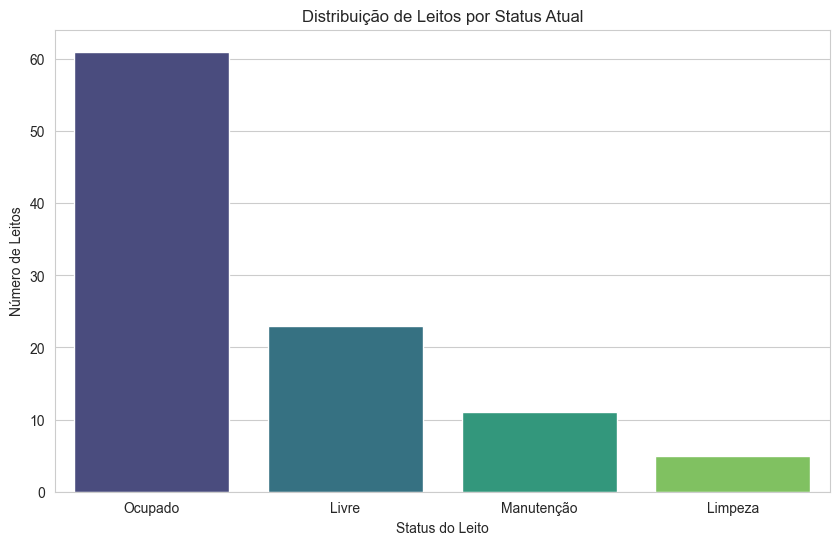

In [18]:
# --- Análises e Geração de Gráficos ---

# Configurações para os gráficos
#"whitegrid" coloca fundo branco e linhas de grade, facilitando a leitura.

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Gráfico 1: Distribuição de Leitos por Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df_leitos, x='Status', palette='viridis', order=df_leitos['Status'].value_counts().index)
plt.title('Distribuição de Leitos por Status Atual')
plt.xlabel('Status do Leito')
plt.ylabel('Número de Leitos')
plt.show()



C:\Users\thiag\AppData\Local\Temp\ipykernel_21396\596538019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_leitos, x='Tipo_Leito', palette='magma', order=df_leitos['Tipo_Leito'].value_counts().index)


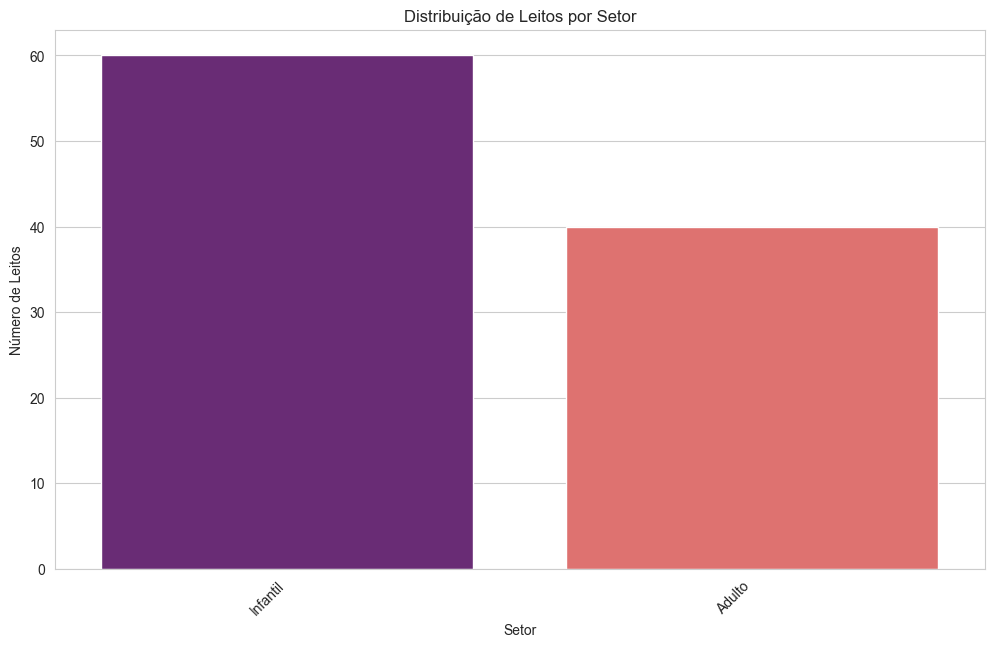

In [19]:
# Gráfico 2: Distribuição de Leitos por Setor
plt.figure(figsize=(12, 7))
sns.countplot(data=df_leitos, x='Tipo_Leito', palette='magma', order=df_leitos['Tipo_Leito'].value_counts().index)
plt.title('Distribuição de Leitos por Setor')
plt.xlabel('Setor')
plt.ylabel('Número de Leitos')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\thiag\AppData\Local\Temp\ipykernel_21396\3768758341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ocupados, x='Setor', palette='rocket', order=df_ocupados['Setor'].value_counts().index)


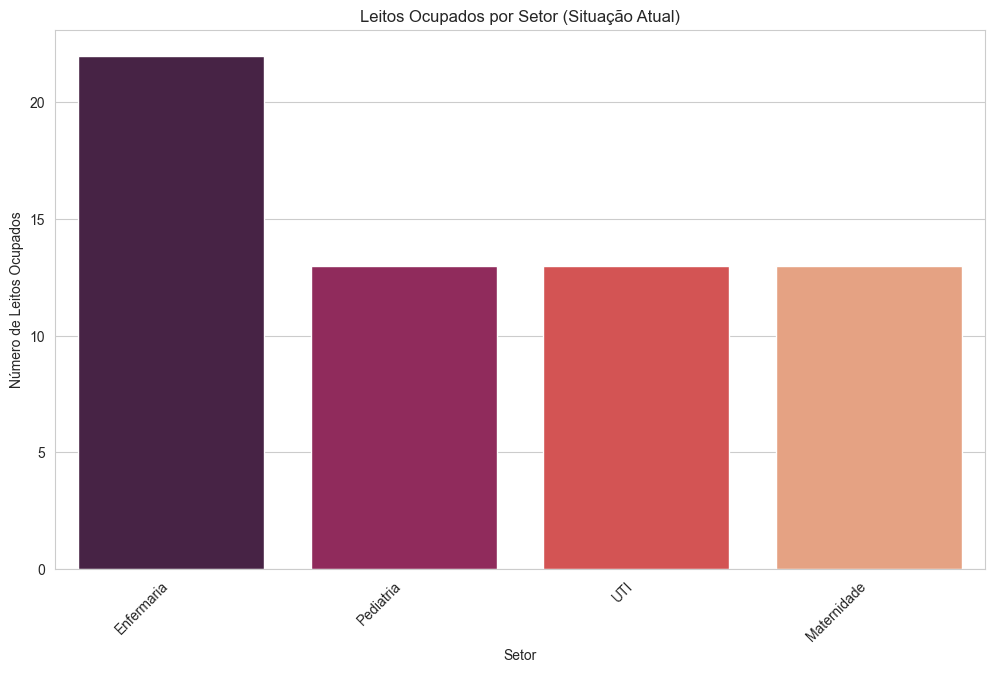

In [21]:
# Gráfico 3: Leitos Ocupados por Setor (Situação Atual)
df_ocupados = df_leitos[df_leitos['Status'] == 'Ocupado']
plt.figure(figsize=(12, 7))
sns.countplot(data=df_ocupados, x='Setor', palette='rocket', order=df_ocupados['Setor'].value_counts().index)
plt.title('Leitos Ocupados por Setor (Situação Atual)')
plt.xlabel('Setor')
plt.ylabel('Número de Leitos Ocupados')
plt.xticks(rotation=45, ha='right')
plt.show()



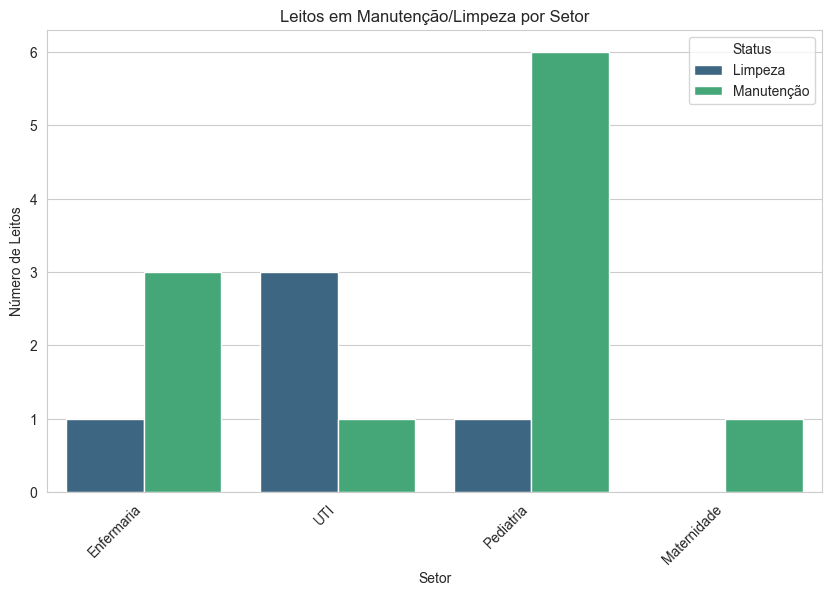

In [22]:
# Gráfico 4: Leitos em Manutenção/Limpeza por Setor
df_manutencao_limpeza = df_leitos[df_leitos['Status'].isin(['Manutenção', 'Limpeza'])]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_manutencao_limpeza, x='Setor', hue='Status', palette='viridis', order=df_leitos['Setor'].value_counts().index)
plt.title('Leitos em Manutenção/Limpeza por Setor')
plt.xlabel('Setor')
plt.ylabel('Número de Leitos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.show()

In [23]:
import pandas as pd

# Salvar DataFrame de Leitos em Excel
df_leitos.to_excel("Leitos_Tratados_Pandas.xlsx", index=False)

# Salvar DataFrame de Pacientes em Excel
df_pacientes.to_excel("Pacientes_Tratados_Pandas.xlsx", index=False)